In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
Beij = pd.read_csv("Beijing_labeled.csv")
Chen = pd.read_csv("Chengdu_labeled.csv")
Guan = pd.read_csv("Guangzhou_labeled.csv")
Shan = pd.read_csv("Shanghai_labeled.csv")
Shen = pd.read_csv("Shenyang_labeled.csv")

Train and validation data

In [3]:
#Train and validate model on data Beij and Shen

Beij_Shen = pd.concat([Beij,Shen])

#Split into X and Y
X = Beij_Shen.iloc[:,0:10]
Y = pd.DataFrame(Beij_Shen.iloc[:,-1])

#Split into train and validation (80% train, 20% validate)
X_train, X_val,  Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)



Test data

In [4]:
#Test seperatley on Shan and Guan

#Split Shan into X and Y
X_test_Shan = Chen.iloc[:,0:10]
Y_test_Shan = pd.DataFrame(Shan.iloc[:,-1])

#Split Guan into X and Y
X_test_Guan = Guan.iloc[:,0:10]
Y_test_Guan = pd.DataFrame(Guan.iloc[:,-1])




#Implementing our own K-means clustering algorithm

In [ ]:
class Cluster: 
  
  def __init__(self, center): 
    self.center = center
    self.data_points = []
    self.data_points_index = []
    self.data_points_label = []
    self.label = 7
  
  def get_center(self):
    return self.center
  
  def get_data_points_index(self): 
    return self.data_points_index
  
  def get_label(self): 
    return self.label

  def update_center(self): 
    new_center = np.mean(self.data_points, axis=0)
    self.center = new_center

  def add_point(self,data_point): 
    self.data_points.append(data_point)

  def add_index(self,index): 
    self.data_points_index.append(index)

  # Set label to most common label of the data points in the cluster
  def set_label(self, labels):
    self.data_points_label = labels.iloc[self.data_points_index].values.astype(int).flatten()
    count = Counter(self.data_points_label)
    self.label = count.most_common(1)[0][0]




  

  


In [ ]:
from IPython.core.events import pre_execute

class KM_classifier: 
  
  def __init__(self,nr_clusters):
    self.nr_clusters = nr_clusters
    self.clusters = []

  def fit(self, X, Y): 
    print("Fitting the data to", self.nr_clusters, "number of clusters")

    # Choose random centers at first
    centroids = X.sample(n = self.nr_clusters).to_numpy()

    # Create initial clusters from centers
    for center in centroids: 
      cluster = Cluster(center) 
      self.clusters.append(cluster)
    
    # Run loop until convergence 
    while True:

      # Empty clusters after each iteration
      for cluster in self.clusters: 
        cluster.data_points = []
        cluster.data_points_index = []
      
      # Calculate euclidean distance from each point to each center
      for index, data_point in X.iterrows():
        
        data_point = data_point.to_numpy()
        
        # List of distances to each centroid
        distances = []
        
        for cluster in self.clusters:

          #compute euclidean distance between data point and center
          distance = np.linalg.norm(data_point - cluster.get_center())
          distances.append(distance)
  
        # The point should be assigned to the closest cluster
        assigned_cluster = self.clusters[distances.index(min(distances))]

        # Assign data point to cluster 
        assigned_cluster.add_point(data_point)
        
        # Add index of data point to keep track of labels later
        assigned_cluster.add_index(index)
      
      # Now each data point is assigned to one of the clusters

      # Updating the centers of the clusters
      avg_distance = 0
      
      for cluster in self.clusters:
        cluster.set_label(Y)
        
        old_center = cluster.get_center()
        cluster.update_center()
        new_center = cluster.get_center()
        avg_distance += np.linalg.norm(old_center - new_center)
      
      avg_distance /= self.nr_clusters

      # Terminate if the average change in cluster location is small
      if avg_distance < 0.01:
        break
        
    return self.clusters
  
  def predict(self, X): 

    predictions = []
    
    for index, data_point in X.iterrows():

      data_point = data_point.to_numpy()

      distances = []

      for cluster in self.clusters:
        #compute euclidean distance between data point and center
        distance = np.linalg.norm(data_point - cluster.get_center())
        distances.append(distance)
    
      # The point should be assigned to the closest cluster
      assigned_cluster = self.clusters[distances.index(min(distances))]

      predictions.append(assigned_cluster.get_label())
    
    return predictions

# Takes list of predictions and list of true labels
  def accuracy(self, predicted_labels, true_labels): 
    count = sum([1 for x, y in zip(predicted_labels, true_labels) if x == y])
    return count/len(predicted_labels)
  
  def precision(self, predicted_labels, true_labels): 
    true_positives = false_positives = 0
    for a, b in zip(predicted_labels, true_labels):
      if a == b[0] == 1:
          true_positives += 1
      elif a == 1 and b[0] == 0:
          false_positives += 1
    
    if true_positives == 0: 
      return 0
    
    else: 
      return true_positives / (true_positives + false_positives) 

#Fit the model


In [ ]:
clas = KM_classifier(70)

clust = clas.fit(X_train,Y_train)

Fitting the data to 70 number of clusters


#Accuracy for traing set

In [ ]:
prediction = clas.predict(X_train)
print("Accuracy score:" , clas.accuracy(prediction,Y_train.values.tolist()))


Accuracy score: 0.7284110535405872


#Validation


In [ ]:
prediction = clas.predict(X_val)

print("Accuracy score:" , clas.accuracy(prediction,Y_val.values.tolist()))
print("Precision:" , clas.precision(prediction,Y_val.values.tolist()))

Accuracy score: 0.7115716753022453
Precision: 0


Fitting the data to 1 number of clusters
Fitting the data to 18 number of clusters
Fitting the data to 36 number of clusters
Fitting the data to 54 number of clusters
Fitting the data to 71 number of clusters
Fitting the data to 89 number of clusters
Fitting the data to 107 number of clusters
Fitting the data to 124 number of clusters
Fitting the data to 142 number of clusters
Fitting the data to 160 number of clusters


Text(0, 0.5, 'Accuracy')

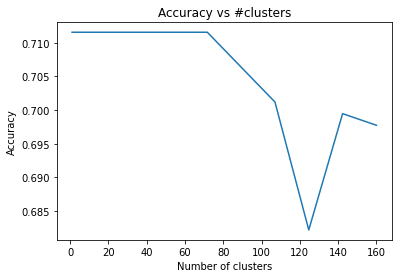

In [ ]:
#Check what number of clusters are most appropriate

nr_clusters = np.linspace(1, 160, 10)

scores = []
for cluster in nr_clusters: 
  clas = KM_classifier(int(cluster))
  clas.fit(X_train,Y_train)
  predictions = clas.predict(X_val)
  true_labels = Y_val.values.tolist()
  score = clas.accuracy(predictions, true_labels)
  scores.append(score)

nr_clusters = nr_clusters.tolist()


plt.plot(nr_clusters, scores)
plt.title("Accuracy vs #clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")


#Testing


In [ ]:
#Guan 

clas = KM_classifier(70)
clas.fit(X_train,Y_train)
predictions = clas.predict(X_test_Guan)
accuracy = clas.accuracy(predictions, Y_test_Guan.values.tolist())
print("Accuracy: ", accuracy)

Fitting the data to 70 number of clusters
Accuracy:  0.9363905325443787


PM_HIGH
0.0        1266
1.0          86
dtype: int64


In [ ]:
#Shan

clas = KM_classifier(70)
clas.fit(X_train,Y_train)
predictions = clas.predict(X_test_Shan)
accuracy = clas.accuracy(predictions, Y_test_Shan.values.tolist())
print("Accuracy: ", accuracy)

Fitting the data to 70 number of clusters
Accuracy:  0.890990990990991


In [ ]:
print("VALUES IN SHAN")
print(Y_test_Shan.value_counts())

print("___________________ \n")

print("VALUES IN GUAN")
print(Y_test_Guan.value_counts())

VALUES IN SHAN
PM_HIGH
0.0        1218
1.0         133
dtype: int64
___________________ 

VALUES IN GUAN
PM_HIGH
0.0        1266
1.0          86
dtype: int64


0


Precision


We can see that the vast majority of the labels in the test datasets are 0 which explains the high accuracy as our model basically predicts 0 for everything. 

#Using built in methods


In [6]:
class Classifier:

    def __init__(self,nr_clusters):
        self.nr_clusters = nr_clusters
      
        self.cluster_labels = []
        self.km = KMeans()

        #return center and label for each cluster
    def fit(self, X, Y):
  
        self.km = KMeans(n_clusters = self.nr_clusters, init='k-means++').fit(X)
        
        cluster_map = pd.DataFrame()
        cluster_map['data_index'] = X.index.values
        cluster_map['cluster'] = self.km.labels_
        
        """
        for cluster in range(self.nr_clusters): #for each cluster
          cluster_labels = []
          for index, row in cluster_map[cluster_map.cluster == cluster].iterrows(): #check PM_high or not
            data_index = cluster_map.iloc[index][0]
            cluster_labels.append(Y.iloc[data_index][0])
          
          # Find majority label in cluster_labels
          count = Counter(cluster_labels)
          majority_label = count.most_common(1)[0][0]

          # Assign label to cluster
          self.cluster_labels.append(majority_label)

        return self.km.cluster_centers_, self.cluster_labels
        """
        for cluster in range(self.nr_clusters): #for each cluster
          labels = []
          for index, row in cluster_map[cluster_map.cluster == cluster].iterrows(): #check PM_high or not
            data_index = cluster_map.iloc[index][0]
            labels.append(Y.iloc[data_index][0])

          # Find majority label in cluster_labels
          count = Counter(labels)
          majority_label = count.most_common(1)[0][0]
          self.cluster_labels.append(majority_label)
            
    
    def predict(self, X):
        
        predictions = []
        for index in self.km.predict(X): #KMeans.predict() returns index of the cluster each sample in X belongs to
            predictions.append(self.cluster_labels[index])

        return predictions
    
    def accuracy(self, predicted_labels, true_labels):
        count = sum([1 for x, y in zip(predicted_labels, true_labels) if x == y])
        return count/len(predicted_labels)
    
    def precision(self, pred, true_labels): 
      true_positives = false_positives = 0
      for a, b in zip(pred, true_labels):
        if a == b[0] == 1:
            true_positives += 1
        elif a == 1 and b[0] == 0:
            false_positives += 1
      
      if true_positives == 0: 
        return 0
      
      else: 
        return true_positives / (true_positives + false_positives) 

#Fit modell

In [8]:

clas = Classifier(70)
clust = clas.fit(X_train,Y_train)




# Accuracy for training set

In [10]:
prediction = clas.predict(X_train)
print("Accuracy score:" , clas.accuracy(prediction,Y_train.values.tolist()))


Accuracy score: 0.7284110535405872


#Validation

In [12]:
prediction = clas.predict(X_val)
print("Accuracy score:" , clas.accuracy(prediction,Y_val.values.tolist()))
print("Precision:" , clas.precision(prediction,Y_val.values.tolist()))

Accuracy score: 0.7115716753022453
Precision: 0


Text(0, 0.5, 'Accuracy')

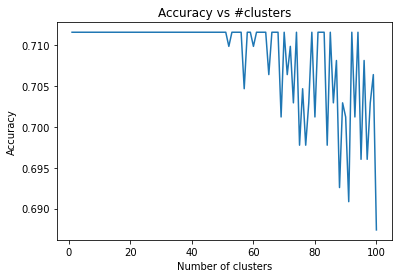

In [14]:
#Check what number of clusters are most appropriate
nr_clusters = np.linspace(1, 100, 100)

scores = []
for cluster in nr_clusters:
  clas = Classifier(int(cluster))
  clas.fit(X_train,Y_train)
  predictions = clas.predict(X_val)
  true_labels = Y_val.values.tolist()
  score = clas.accuracy(predictions, true_labels)
  scores.append(score)

nr_clusters = nr_clusters.tolist()

plt.plot(nr_clusters, scores)
plt.title("Accuracy vs #clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")


# Test

In [19]:
#Shan

clas = Classifier(70)
clas.fit(X_train,Y_train)
predictions = clas.predict(X_test_Shan)
accuracy = clas.accuracy(predictions, Y_test_Shan.values.tolist())
print("Accuracy: ", accuracy)


Accuracy:  0.890990990990991


In [20]:
#Guan

clas = Classifier(70)
clas.fit(X_train,Y_train)
predictions = clas.predict(X_test_Guan)
accuracy = clas.accuracy(predictions, Y_test_Guan.values.tolist())

print("Accuracy: ", accuracy)


Accuracy:  0.9363905325443787


#Balancing the data by oversampling 1 

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the oversampling strategy
oversampling = SMOTE()

# Fit and transform the data
X_resampled, y_resampled = oversampling.fit_resample(X, Y)


In [ ]:
values = np.linspace(1,200,50)

acc =[]
prec = []

for k in values: 
  clas = Classifier(int(k))
  clas.fit(X_resampled,y_resampled)
  predictions = clas.predict(X_test_Shan)
  accuracy = clas.accuracy(predictions, Y_test_Shan.values.tolist())
  precision = clas.precision(predictions, Y_test_Shan.values.tolist())
  acc.append(accuracy)
  prec.append(precision)



<function matplotlib.pyplot.show(*args, **kw)>

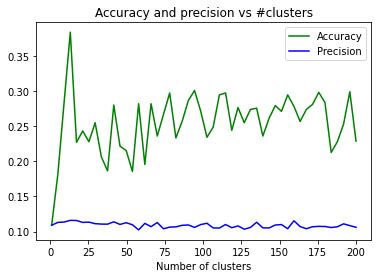

In [ ]:
plt.title("Accuracy and precision vs #clusters")
plt.plot(values,acc, color = 'green', label = "Accuracy")
plt.plot(values,prec, color = 'blue', label = "Precision")
plt.legend()
plt.xlabel("Number of clusters")
plt.show